# Análise de Precificação de Serviços
### Parte 1<br>
Empresas prestadoras de serviços tem como um dos principais insumos para execução dos seus serviços as horas de trabalho dos funcionários. No setor da construção civil, empresas que desenvolvem projetos contam com profissionais com maior qualificação e custo por hora de trabalho relativamente maior dentro do setor.<br>

A precificação de serviços de desenvolvimento de projetos envolve a mensuração dos custos para sua execução, tais como: deslocamentos, hospedagem, taxas, impressões e horas de trabalho. Todos são relativamente simples de estimar e de serem renegociados com o contratante no caso de extrapolarem os limites contratuais, com exceção das horas de trabalho.<br>

Estas são um componente muito específico da produtividade, que por sí é um tema muito complexo. O fato é que o tempo empregado para executar um projeto pode variar significativamente conforme a pessoa que executa a tarefa, o demandante, o tipo da tarefa, etc.<br>

Além do fato do custo das horas de trabalho ter a maior participação no custo total dos projetos, elas são fator determinante para a incorporação das despesas fixas da empresa aos custos dos projetos, já que elas costumam ser rateadas nas horas de trabalho dos diversos projetos; em geral, a mensuração das horas alocadas a um projeto é feita através de estimativas. Ou seja, **representam o maior componente de risco do negócio**.<br>

As maiores despesas da empresa (folha de pagamento e despesas administrativas) estão relacionadas a um bom conhecimento sobre as horas de trabalho de cada funcionário tornando as informações deste domínio fundamentais para o sucesso financeiro da empresa de projetos.<br>

### 1. Contexto
Este projeto surge no contexto da necessidade de uma empresa que presta **serviços de arquitetura**, de melhor compreender o emprego do tempo de trabalho dos membros da equipe, no intuito de obter insights gerais sobre o negócio, melhorias na produtividade e estimativas mais precisas para precificação de projetos.<br>
<br>
Foram utilizados para este fim os dados já gerados pela empresa ao longo do tempo: registros de horas de trabalho por profissional, parte em arquivos de planilhas eletrônicas mensais, preenchidas manualmente; arquivos .csv com registros de tempo gerados através de aplcativo Clockify (a partir de 2022 os registros deixaram de ser feitos em planilhas preenchidas manualmente); planilhas de precificação individualizadas por projeto, contendo entre outras informações, a quantidade horas de trabalho estimadas.<br>
<br>
Além da obtenção dos dados para as análises, há necessidade de estabelecer rotinas mais adequadas para coleta e armazenamento dos dados gerados no futuro, em um banco de dados relacional.

### 2. Escopo
- Armazenar eficientemente informações sobre tempo de trabalho da equipe e poder extrair dados resumidos
- Ter clareza sobre o emprego do tempo de trabalho dos membros da equipe
- Subsidiar a avaliação do resultado financeiro dos projetos.
- Identificar perfis de projetos que tendem a extrapolar estimativas de custo
- Prever estimativas de horas de trabalho para projetos futuros para auxiliar na elaboração de propostas comerciais, reduzindo riscos de prejuízos financeiros.

### 3. Planejamento
- Definir a estrutura de dados a ser utilizada para armazenamento de dados de tempo de trabalho e escolha de metodologia e ferramentas para ingestão destes dados;
- Extração, limpeza e tratamento de dados provenientes das planilhas existentes;
- Carregar os dados extraídos para um banco de dados que receberá também os futuros registros;
- Inclusão de dados complementares com informações sobre os projetos que não tenham sido possíveis de obter na extração inicial;
- Fazer análise exploratória dos dados;
- Criação de modelo de ML para prever horas de trabalho em projetos futuros a partir do perfil do projeto e contratante;

### 4. Implementação

#### 4.1. Definição da estrutura de dados para armazenamento

A modelagem lógica do banco de dados deve atender às necessidades de armazenagem tanto dos dados disponíveis coletados como daqueles que serão gerados no futuro. Também deve incorporar informações que possam ser de interesse futuramente e que até então não tenham sido utilizadas. As entidades que deverão ser registradas são duas:<br>

1. Registros de tempo: Deve receber os dados "crus" de uso de tempo que serão posteriormente agrupados conforme necessidades analíticas.<br>

`id_tempo`: identificador da entrada;<br>
`id_projeto`: identificador do projeto ao qual refere-se a entrada;<br>
`nome_projeto`: nome do projeto;<br>
*este campo seria dispensável já que a informação poder ser obtida através de cruzamento com a tabela de projetos, considerando um cenário ideal de obtenção de dados. Porém, será necessário armazenar esta informação no momento da extração dos dados das tabelas de horas, pois não consta nelas o identificador do projeto, somente o nome*;<br> 
`tarefa`: tarefa dentro do projeto. Dado que não será ainda utilizado, mas vem sendo gerado a partir da adoção do Clockify;<br>
`id_pessoa`: identificador da pessoa;<br>
`data_registro:`: data do registro;<br>
`hora_ini`: horário de início da atividade;<br>
`hora_fim`: hora de finalização da atividade;<br>
`duracao`: duração de tempo da atividade. O dado quantitativo principal. Em princípio, não seria necessário registrar os horários de início e fim, mas podem ser úteis em análises posteriores;<br>

    
2. Projetos: deve conter informações que permitam caracterizar os projetos e possibilitar análises e predições a partir delas.<br>

`id_projeto`: identificador do projeto;<br>
`nome_projeto`: nome do projeto;<br>
`area`: área de intervenção / área construída do projeto em metros quadrados;<br>
`tipo_cliente`: cliente pessoa física ou jurídica;<br>
`responsável`: profissional responsável/líder do projeto;<br>
`tipologia`: tipo de projeto Residencial Unifamiliar (RU), Residencial Multifamiliar(RM), Comercial(CO), Corporativo(CP), Institucional(IN), Misto(M);<br>
`projeto_arq`: escopo do projeto inclui projeto arquitetônico/de edificação (S/N);<br>
`projeto_int`: escopo do projeto inlcui arquitetura de interiores/decoração (S/N);<br>
`projeto_outros`: escopo do projeto inclui outras especialidades - paisagismo, consultoria, prevenção de incêndios (S/N);<br>
`reforma`: se o projeto trata de uma reforma;<br>
`gerenciamento`: escopo da contratação inclui gerenciamento da obra (S/N);<br>
`complexidade`: grau de complexidade e/ou detalhamento do projeto numa escala numérica de 1 a 3;<br>
`hs_estim_arq`: horas estimadas de arquitetos;<br>
`hs_estim_est`: horas estimadas de estagiários;<br>
`hs_estim_pro`: horas estimadas de projetistas;<br>
`percent_concluido`: percentual do escopo concluído. Permite aferir o andamento do trabalho antes da conclusão, ou ajustar o consumo de horas em casos de projetos encerrados antes da conclusão;<br>

3. Pessoas: Deve armazenar informações sobre os colaboradores informando ao menos seus cargos, de modo que possa ser mensurado o consumo de recursos humanos nas análies. Mais informações poderiam ser agregadas nesta tabela, mas ficarão restritas para atender estritamente aos objetivos deste projeto.<br>

`id_pessoa`: identificador da pessoa;<br>
`nome`: nome completo do colaborador;<br>
`cargo`: cargo da pessoa;<br>

O banco de dados foi criado usando como plataforma o MySQL:

~~~
CREATE DATABASE IF NOT EXISTS prodserv;

USE prodserv;

CREATE TABLE IF NOT EXISTS projetos
	(
	id_projeto VARCHAR(8) NOT NULL UNIQUE PRIMARY KEY,
	nome_projeto VARCHAR(50),
	area DECIMAL(7,2),
	tipo_cliente CHAR(1) CHECK (tipo_cliente IN("F","J")),
	responsavel VARCHAR(5),
	tipologia VARCHAR(2) CHECK (tipologia IN ("RU","RM","CO","CP","IN","MI")),
	projeto_arq CHAR(1) CHECK (projeto_arq IN("S","N")),
	projeto_int CHAR(1) CHECK (projeto_int IN("S","N")),
	projeto_outros CHAR(1) CHECK (projeto_outros IN("S","N")),
    reforma CHAR(1) CHECK (reforma IN("S","N")),
	gerenciamento CHAR(1) CHECK (gerenciamento IN("S","N")),
    complexidade INT CHECK (complexidade IN(1,2,3)),
	hs_estim_arq DECIMAL(5,2),
	hs_estim_est DECIMAL(5,2),
    hs_estim_pro DECIMAL(5,2),
	percent_concluido DECIMAL(4,2),
    )
    COMMENT "Criação da tabela que armazena projetos";

CREATE TABLE IF NOT EXISTS uso_tempo
	(
	id_tempo INT NOT NULL AUTO_INCREMENT PRIMARY KEY,
	id_projeto VARCHAR(8),
    nome_projeto VARCHAR(20),
	tarefa VARCHAR(20),
	id_pessoa CHAR(3),
	data_registro DATE,
	hora_ini TIME,
	hora_fim TIME,
	duracao DECIMAL(4,2)
    )
    COMMENT "Criação de tabela que armazenará os registros de tempo";
    
CREATE TABLE IF NOT EXISTS pessoas
	(
	id_pessoa CHAR(3) NOT NULL PRIMARY KEY,
	nome VARCHAR(20),
	cargo CHAR(3) CHECK (cargo IN ("EST","ARQ","PRO"))
    )
    COMMENT "Criação de tabela que armazenará os nomes dos colaboradores e respectivos cargos";
~~~

Inicialmente não serão feitas as vinculações entre as tabelas pelos identificadores das entidades, já que elas somente existirão no banco de dados após a extração.

#### 4.1. Extração, transformação e carga de dados existentes
Os dados foram extraídos de arquivos de planilhas eletrônicas (.xls) e de arquivos .csv que foram gerados ao longo do tempo em registros administrativos.<br>
**Registros de tempo**: 124 arquivos mensais de planilhas de registros diários de horas por projeto, com uma aba para cada profissional efetuar os registros manuais.

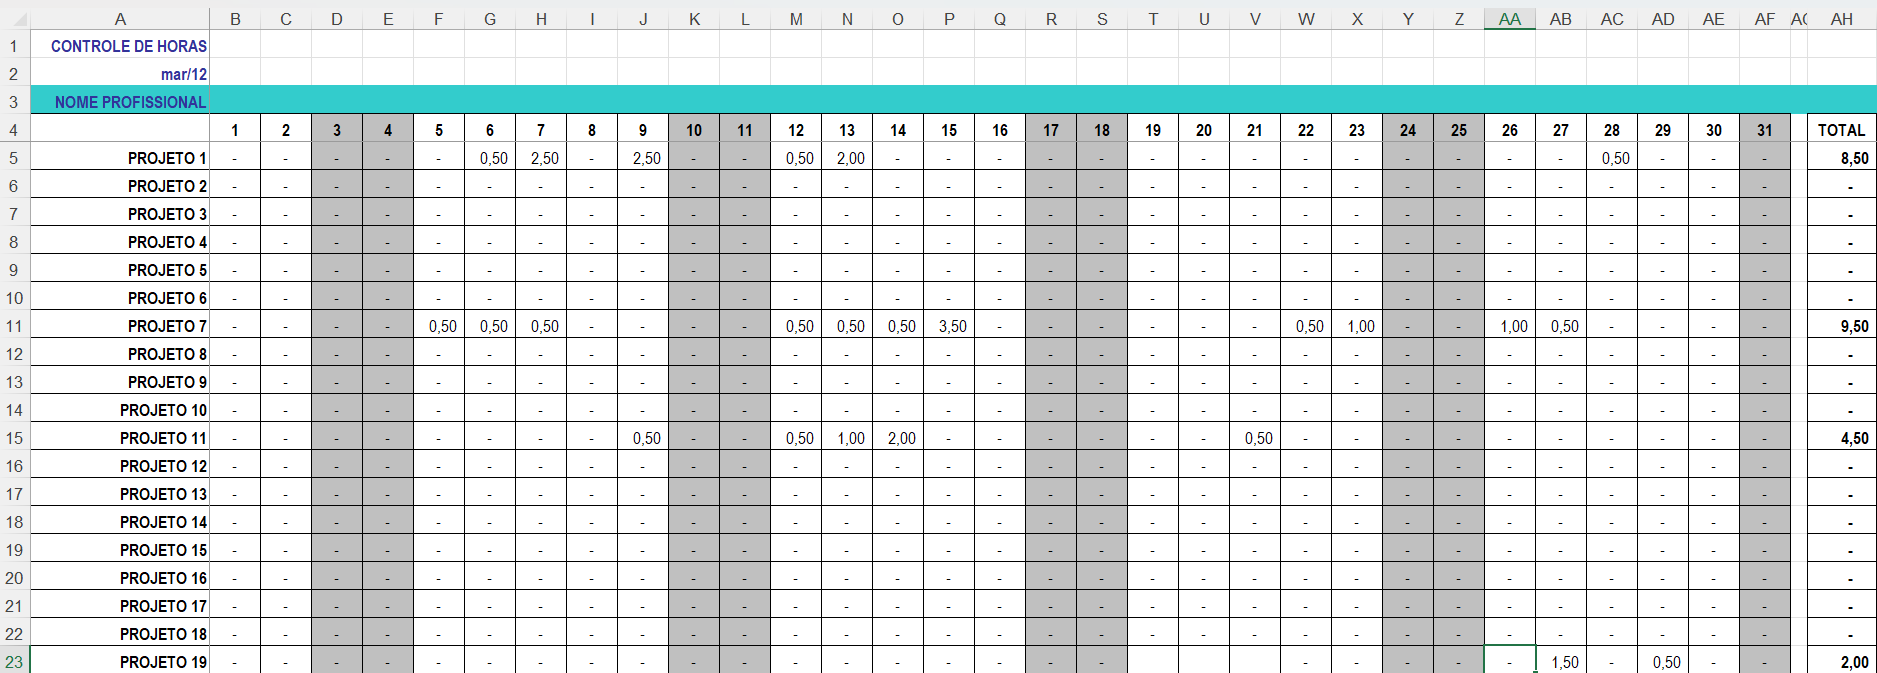

*Exemplo planilha de registro de horas*<br>

>- **Projetos**: 119 arquivos de planilhas de precificação contendo a estimativa de horas feita inicialmente para cada projeto, de acordo com o uso de cada profissional.

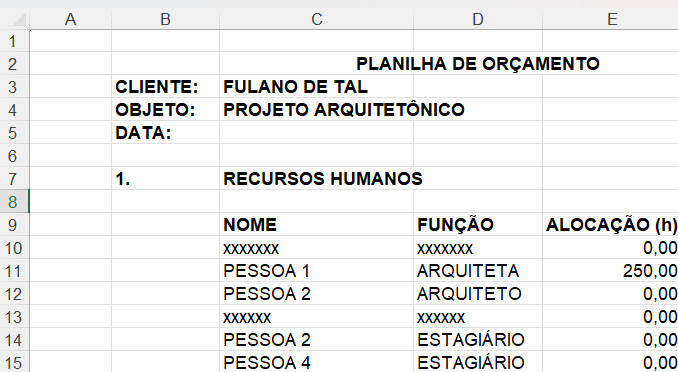

*Exemplo planilha de orçamento*

In [1]:
import os
import pandas as pd
import numpy as np
import mysql.connector
from datetime import date
import re
import unidecode
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Migue\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Função que itera sobre todo o diretorio e subdiretórios onde estão as planilhas de registros de tempo

def ler_diretorio_hs():

    conteudo = os.scandir()

    for c in conteudo:

        if c.is_dir():
            if c.name == 'Processados':
                continue
            print (f'\nLendo pasta {c.name}')
            os.chdir(c.name)
            ler_diretorio_hs()
            os.chdir('..')

        elif c.is_file():
            if '.xls' in c.name:
                print (f'Lendo arquivo {c.name}')
                ler_tabela(c.name) # chamada da função que extrai os dados das planilhas quando tratar-se de um arquivo .xls

In [ ]:
"""
Esta função extrairá os dados de tempo das planilhas de horas e os carregará como entradas de tempo na tabela "uso_tempo"
no banco de dados, através da conexão com o MySQLServer.
A função receberá como parâmetros o nome da tabela, a tabela em si, como um Dataframe do Pandas, o mês e ano dos lançamentos.
Além das planilhas individuais por colaborador há planilhas que não são de interesse, intituladas 'INSTRUÇÕES',
'TOTAL' e 'RESUMO', que serão descartadas.
"""

def ler_tabela (plan_mes):

    periodo = plan_mes.split(sep='.')[0]
    mes = int(periodo[-2:])
    ano = int(periodo[-7:-3])
    planilha = pd.read_excel(plan_mes, skiprows=3, sheet_name=None)

    for nome_tabela, tabela in planilha.items():

        if nome_tabela in ['INSTRUÇÕES', 'TOTAL', 'RESUMO']:
            print (f'Descartando tabela {nome_tabela}\n')
        else:
            print (f'\nExtraindo dados da tabela {nome_tabela}\n')
            idx_total = tabela.index[tabela['Unnamed: 0'] == 'TOTAL'].tolist()[0]
            idx_remover = [i for i in range(idx_total-1, tabela.shape[0])]
            tabela.drop(index = idx_remover, inplace = True)

            entries = 0

            for nome_coluna, coluna in tabela.items():

                if type(nome_coluna) is int:

                    for idx, linha in coluna.items():

                        if type(linha) == str:
                            continue

                        elif linha > 0:

                            pessoa = nome_tabela[:3]
                            projeto = tabela.iloc[idx, 0]
                            data_t = date(ano, mes, nome_coluna)
                            print (f'{pessoa} :: {projeto}  :: {data_t} :: {linha}')

                            cursor.execute (f'INSERT INTO uso_tempo (nome_projeto, id_pessoa, data, duracao)\
                                            VALUES ("{projeto}","{pessoa}", "{data_t}", {linha})')
                            cnx.commit()

                            entries += 1

            print (f'Total Entradas: {entries}')

    return

In [ ]:
"""
Função que extrai informações de horas estimadas na orçamentação dos projetos e grava num registro da tabela 'projetos'.
Cada orçamento de projeto possui uma planilha com todos os custos previstos, entre eles uma tabela
com as horas de trabalho alocadas para cada colaborador e sua função (arquiteto, estagiário, projetista).
A função recebe o nome do diretório e do arquivo. O código identificador de cada projeto,
a ser armazenado no campo id_projeto é extraido a partir dos nomes dos arquivos, que recebem este
código como prefixo. Exemplo: ('2023-145 Fulano de Tal.xls').

Estas informações serão extraídas com o uso de Expressões Regulares.
"""

def extrair_projetos(nome_arquivo):

    if '.xls' in nome_arquivo:

        nome_planilha = unidecode.unidecode(nome_arquivo)
        nome_planilha = nome_planilha.upper()

        mascara_prefixo = re.compile(r'\b[0-9]+-[0-9]+')
        id_projeto = mascara_prefixo.findall(nome_planilha)
        mascara_nome = re.compile(r'(?:[0-9 -]{2,})+([A-Za-z0-9 -]{2,})+(?:\.)')
        nome_projeto = mascara_nome.findall(nome_planilha)
        mascara_extensao = re.compile(r'\.[A-Z]*')

        id_projeto = id_projeto[0]
        nome_projeto = nome_projeto[0]
        print(f'\nid_projeto: {id_projeto}')
        print(f'nome_projeto: {nome_projeto}')

        #Aqui é feita a leitura da planilha para um DataFrame Pandas e as horas totalizadas conforme a função

        tempo_estimado = pd.read_excel(nome_arquivo,\
                        skiprows = 8, nrows = 6, usecols = 'D:E', names=['funcao','horas'])
        tempo_estimado.funcao = tempo_estimado.funcao.transform(lambda x: x.str[0:3])
        resumo = tempo_estimado.groupby('funcao').sum()
        funcs = resumo.index.values
        hs_estim_arq, hs_estim_est, hs_estim_pro = 0, 0, 0

        if 'ARQ' in funcs:
            hs_estim_arq = resumo.loc['ARQ','horas']
        if 'EST' in funcs:
            hs_estim_est = resumo.loc['EST','horas']
        if 'PRO' in funcs:
            hs_estim_pro = resumo.loc['PRO','horas']

        print(f'hs_estim_arq: {hs_estim_arq}')
        print(f'hs_estim_est: {hs_estim_est}')
        print(f'hs_estim_pro: {hs_estim_pro}')


        cursor.execute(f'INSERT INTO projetos (id_projeto,nome_projeto, hs_estim_arq, hs_estim_est, hs_estim_pro) \
                        VALUES ("{id_projeto}" , "{nome_projeto}" , {hs_estim_arq}, {hs_estim_est}, {hs_estim_pro})')

        cnx.commit()

        return

In [2]:
# instanciamento da conexão com o banco de dados do MySQL e do ponteiro/cursor

cnx = mysql.connector.connect(user = 'adm', password = 'adm123',
                             host = '127.0.0.1')
cursor = cnx.cursor(buffered = True)
cursor.execute ('USE prodserv')

In [ ]:
# Chamada da função para ler o diretório de horas, extrair os dados e carregar no banco

os.chdir('C:\\Users\\Migue\\Documents\\PF_DS\\Produtividade\\Dados\\Planilhas_Horas')
ler_diretorio_hs()

In [ ]:
""" Neste bloco é feita uma iteração sobre os arquivos contidos na pasta de Planilhas orçamentárias e executada
sobre cada uma delas a função 'extrair_projetos()', a qual irá criar os registros dos projetos e também alimentar as
informações sobre horas de trabalho estimadas. Demais campos da tabela que caracterizam os projetos deverão ser inseridas
manualmente.
"""

os.chdir('C:\\Users\\Migue\\Documents\\PF_DS\\Produtividade\\Dados\\Planilhas_orcamentos')
conteudo = os.scandir()

for c in conteudo:
    if c.is_file():
        extrair_projetos(c.name)


#### 4.2. Inclusão de identificadores de projeto aos registros de tempo
Na extração dos registros de tempo foi possível extrair somente os nomes dos projetos, sem o identificador correspondente na tabela de projetos. Em princípio seria possível automatizar o cruzamente destas tabelas através do campo `nome_projeto` entre as tabelas. No entanto, muitos casos não há correspondência por motivos como erros de digitação e/ou nomenclaturas diferentes entre a tabela de precificação e a de horas.<br>

Nesta seção é feita a atribuição dos identificadores dos projetos na tabela `uso_tempo` buscando similaridades entre os campos `nome_projeto` nas duas tabelas. Foi calculado o índice de similaridade entre cada nome de projeto constante na tabela `uso_tempo` com cada um dos nomes de projeto da tabela `projetos`, resultando em uma matriz. Os três nomes com maior similaridade selecionados.<br>

Foi necessária uma análise manual dos resultados e identificou-se um limiar de 44% de similaridade mínima para validar uma correspondência. Para valores abaixo destes, foi necessário fazer a correspondência manualmente. Então o campo `id_projeto` dos registros de tempo foram devidamente preenchidos conforme os projetos.<br>

In [ ]:
# Instrução SQL para obter os nomes de projeto agrupados da tabela uso_tempo

sql = 'SELECT nome_projeto\
        FROM uso_tempo\
        WHERE id_projeto IS NULL\
        GROUP BY nome_projeto ORDER BY 1'

In [ ]:
# execução da instrução a captura dos dados para um Dataframe

cursor.execute (sql)
colunas = cursor.column_names
dados = cursor.fetchall()
df_uso = pd.DataFrame(data = dados, columns = colunas)

In [ ]:
df_uso.sample(5)

In [ ]:
# criação de colunas para índices de similaridade e correspondente nome de projeto

df_uso.insert(loc = 1, column = 'sim_1', value = 0.0)
df_uso.insert(loc = 2, column = 'match_1', value = '')
df_uso.insert(loc = 3, column = 'sim_2', value = 0.0)
df_uso.insert(loc = 4, column = 'match_2', value = '')
df_uso.insert(loc = 5, column = 'sim_3', value = 0.0)
df_uso.insert(loc = 6, column = 'match_3', value = '')

In [ ]:
# instrução SQL para obter nomes e id´s de projetos de tabela de projetos

sql = 'SELECT id_projeto, nome_projeto FROM projetos'

In [ ]:
# execução da instrução e criação de dataframe

cursor.execute (sql)
colunas = cursor.column_names
dados = cursor.fetchall()
df_projetos = pd.DataFrame(data = dados, columns = colunas)

In [ ]:
df_projetos.sample(5)

In [ ]:
idx_usos = df_uso.index
idx_projetos = df_projetos.index

# instanciamento do vetorizador
vect = CountVectorizer(analyzer = 'word', ngram_range = (1,1),\
                       strip_accents = 'unicode', lowercase = False)


for idx_u in idx_usos: # iteração sobre todos os nomes de projetos presentes na tabela de registros de tempo

    p1 = df_uso.loc[idx_u,'nome_projeto']
    similaridades = np.zeros(df_projetos.shape[0])

    for idx in idx_projetos: # iteração sobre cada um dos nomes de projeto da tabela de projetos e cálculo das similaridades
        
        p2 = df_projetos.loc[idx,'nome_projeto']
        vocab = vect.fit_transform([p1, p2])
        textos = vocab.toarray()
        intersect = np.min (textos, axis = 0)
        soma_intersect = np.sum(intersect)
        soma_base1 = np.sum(textos[0])
        soma_base2 = np.sum(textos[1])
        similaridade1 = soma_intersect / soma_base1
        similaridade2 = soma_intersect / soma_base2
        similaridade = similaridade1 * similaridade2
        similaridades[idx] = similaridade

    # os três nomes com maior similaridade são selecionados e preenchidos nos campos do dataframe
    
    idx_max = np.argsort(similaridades)[-3::][::-1] 

    df_uso.loc[idx_u,'sim_1'] = round(similaridades[idx_max[0]],2)
    df_uso.loc[idx_u,'match_1'] = df_projetos.loc[idx_max[0],'nome_projeto']\

    df_uso.loc[idx_u,'sim_2'] = round(similaridades[idx_max[1]],2)
    df_uso.loc[idx_u,'match_2'] = df_projetos.loc[idx_max[1],'nome_projeto']\

    df_uso.loc[idx_u,'sim_3'] = round(similaridades[idx_max[2]],2)
    df_uso.loc[idx_u,'match_3'] = df_projetos.loc[idx_max[2],'nome_projeto']\

df_uso.sort_values(by = 'sim_1', ascending = False)

In [ ]:
"""
Uma string é preenchida manualmente na qual cada linha contém dois nomes de projetos separados por vírgula sendo o primeiro
o nome encontrado na tabela de tempos que está incorreto e o segundo aquele que deve ser utilizado para encontrar
correspondência na tabela de projetos
"""

substit = """nome_errado1,nome_certo1
nome_errado2, nome_certo2
etc, etc"""

In [ ]:
"""
É feita uma iteração sobre as linhas da string e executada a instrução SQL para atualizar o nome do projeto conforme
as correspondências encontradas
"""

mascara_linhas = re.compile('\n')
mascara_itens = re.compile(',')
linhas = mascara_linhas.split(substit)
for l in linhas:
    itens = mascara_itens.split(l)
    sql = f'UPDATE uso_tempo SET nome_projeto = "{itens[1]}" WHERE nome_projeto = "{itens[0]}"'
    cursor.execute(sql)
    cnx.commit()

In [ ]:
"""
São selecionados os nomes de projetos que com similaridade maior ou igual a 44% e automaticamente atualizados os id´s
de projetos conforme os projetos correspondentes
"""

df_uso.drop(columns=['sim_2','match_2','sim_3','match_3'], inplace = True)
df_uso.insert(loc = 3, column = 'id_match', value = '')
df_uso_ok = df_uso[df_uso['sim_1'] >= 0.44].copy()
df_uso_ok.drop(columns = 'sim_1', inplace = True)
df_uso_ok.insert(loc = 2, column = 'id_match', value = '')
df_uso_cod = df_uso_ok.merge (df_projetos, how='left', left_on = 'match_1', right_on = 'nome_projeto')

iter_uso = df_uso_cod.iterrows()
for i in iter_uso:
    nome_projeto = i[1]['nome_projeto_x']
    id_projeto = i[1]['id_projeto']
    cursor.execute(f'UPDATE uso_tempo SET id_projeto = "{id_projeto}" WHERE nome_projeto = "{nome_projeto}"')
    cnx.commit()

#### 4.3. Extração e carga de registro de tempo do Clockify
Os registros de tempo a partir de 2022 passaram a ser feitos através da plataforma Clockify, que permite a exportação dos dados em formato .csv. Neste caso, os registros já vem em formato mais adequado ao banco de dados. São selecionadas as colunas de interesse e a formatação dos dados conforme definido no banco de dados, principalmente as datas.<br>

A única transformação necessária é para compor o campo `id_projeto`. No arquivo .csv a coluna `projeto` já contém o código identificador do projeto agrupado ao nome do projeto. Por exemplo: "2022-120-Fulano de Tal". Somente o número identificador é extraído.<br>

As tarefas de natureza administrativa são registradas na tabela de projetos com prefixo '0000' e sufixos que as identificam. São elas: Gestão (01), Mercado(02), Métodos e Processos(03), Capacitação(04). Este processamento também é feito antes de carregar o registro no banco de dados.<br>

Esta função será utilizada periodicamente para carregar novos dados de ora em diante.<br>

In [ ]:
def ler_clockify (caminho)
    df_clock = pd.read_csv(caminho)
    df_clock.drop (columns = ['Descrição','Grupo','Email','Etiqueta','Faturável','Data final','Duração (h)',\
                            'Valor faturável (USD)','Valor Faturável (USD)'], inplace = True)
    df_clock.columns = df_clock.columns.str.lower().str.replace(" ","_")
    df_clock.columns = ['projeto','cliente','tarefa','usuario','data_ini','hora_ini','hora_fim','duracao']

    idx_remover = df_clock[df_clock['cliente']=='_Pessoal'].index
    df_clock.drop(axis = 0, index = idx_remover, inplace = True)

    df_clock.insert(loc = 0, column = 'id_projeto', value = '')
    df_clock['id_projeto'] = df_clock['projeto'].str.extract(r"(^[0-9]*-{1}[0-9]*)")

    idx_adm_nan = df_clock[(df_clock.id_projeto == '0000-00') & (df_clock.tarefa.isnull())].index
    atualiza_nan = pd.Series(data = "Gestão", index = idx_adm_nan, name = 'tarefa')
    df_clock.update (atualiza_nan)

    iter_clock = df_clock.iterrows()
    dicio_adm = {'Gestão':'01', 'Mercado':'02', 'Métodos e processos':'03', 'Capacitação':'04'}
    for i in iter_clock:
        linha = i[1]
        if linha.id_projeto == '0000-00':
            linha.id_projeto = '0000-' + dicio_adm[linha.tarefa]

        cursor.execute (f"INSERT INTO uso_tempo (id_projeto, tarefa, id_pessoa, data_registro, hora_ini, hora_fim, duracao)\
                        VALUES ('{linha.id_projeto}','{linha.tarefa}','{linha.usuario}',\
                        STR_TO_DATE('{linha.data_ini}', '%d/%m/%Y'),\
                        STR_TO_DATE('{linha.hora_ini}', '%H:%i:%s'),\
                        STR_TO_DATE('{linha.hora_fim}', '%H:%i:%s'), {linha.duracao})")

    cnx.commit()

In [ ]:
# chamada da função para extrair dados do arquivo exportado do Clockify

ler_clockify('C:\\Users\\Migue\\Documents\\PF_DS\\Produtividade\\Dados\\Clockify\Clockify.csv')

Após a conclusão da extração dos dados temos:<br>

`projetos`: 124 registros<br>

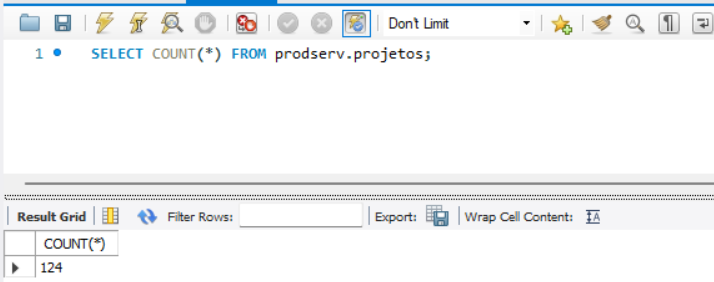

<br>

`uso_tempo`: 18.636 registros<br>

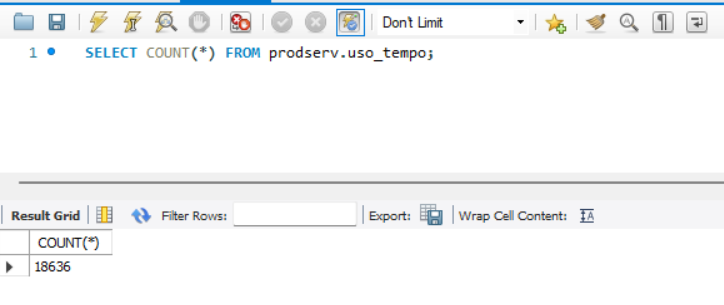

<br>

#### 4.4. Inclusão manual de dados de projetos
Os campos da tabela de projetos que qualificam as entidades não estavam disponíveis nas fontes de dados e são importantes na modelagem do problema. Sua inclusão no banco de dados é relevante para o projeto e foi feita manualmente através da interface do MySQL WorkBench.<br>

Serão preenchidos os campos: `area`, `tipo_cliente`, `responsável`, `projeto_arq`, `projeto_int`, `projeto_outros`,
`gerenciamento`,`percent_concluido`

<br>

Da mesma forma, há projetos que possuem registros de tempo, para os quais nã existem planilhas orçamentárias correpondentes. Estes projetos deverão ser registrados da tabela `projetos` de maneira manual. Estes são casos de projetos mais antigos, para os quais não foi preenchida uma planilha orçamentária e por conseguinte não há estimativa de horas. No entanto, ainda assim os dados de tempo gasto nos projetos podem ser aproveitáveis para o estudo.

<br>

Após a inclusão de tais projetos, é feita a atualização em massa do campo `id_projeto` com base nas correspondências entre os campos `nome_projeto`, diretamente no MySQL:

<br>

~~~
WITH sub AS
(
SELECT p.id_projeto, u.nome_projeto
	FROM projetos AS p
    INNER JOIN uso_tempo AS u
    ON p.nome_projeto = u.nome_projeto
    WHERE u.id_projeto IS NULL
    GROUP BY p.id_projeto
)
    
UPDATE uso_tempo, sub
	SET uso_tempo.id_projeto = sub.id_projeto
    WHERE uso_tempo.nome_projeto = sub.nome_projeto;
~~~
 
<br>

Há ainda registros de tempo que, igualmente não possuem correspondência com projetos por outros motivos que os tornam irrelevantes para as análises aqui pretendidas. Podem ser o caso de projetos que já estavam em andamento quando da adoção do controle de horas e, portanto representam uma aferição incompleta; tratam-se não propriamente de projetos, mas de serviços de outra natureza prestados pelo escritório, tais como gestão e execução de obra (sem o serviço de projeto incluso), fiscalizações, consultorias, etc.

<br>
A estes registros serão atribuídos id´s de projeto iniciando com "0000-" de modo que sejam facilmente filtrados em análises, mas mantendo seu registro no banco para outras finalidades que possam surgir. A seguinte consulta filtra estes registros e cria os novos registros de projeto na tabela `projeto` gerando um identificador automático.

~~~
INSERT INTO projetos(id_projeto, nome_projeto)
    SELECT CONCAT("0000-", ROW_NUMBER() OVER()+6) AS id_projeto, sub1.nome_projeto AS nome_projeto
        FROM (
            WITH sub AS
            (
            SELECT u.* FROM uso_tempo AS u
                LEFT JOIN projetos AS p ON u.id_projeto = p.id_projeto
                WHERE p.id_projeto IS NULL
            )

            SELECT DISTINCT(sub.nome_projeto) FROM sub ORDER BY 1
            ) AS sub1;
~~~

Depois, é rodada a consulta anterior para atualizar o campo `id_projeto` nos registros de tempo. O campo `nome_projeto` na tabela `uso_tempo` pode ser excluído para reduzir espaço em memória. A informação do nome do projeto poderá ser acessada via cruzamente de tabelas usando o `id_projeto` como chave.<br>

~~~
ALTER TABLE uso_tempo DROP nome_projeto;

~~~


#### 4.5. Preenchimento da tabela `pessoas`
Os registros da tabela `pessoas` serão criados de forma automática, gerando os identificadores a partir dos valores únicos presentes na tabela `uso_tempo`. <br>

~~~
INSERT INTO pessoas (id_pessoa) SELECT DISTINCT(id_pessoa) FROM uso_tempo;
~~~
<br>
A partir dos registros criados, os demais dados serão preenchidos manualmente (nome e cargo).

#### 4.6. Vinculação entre as tabelas
Após a extração dos dados externos, é possível fazer a vinculação entre as tabelas, estabelecendo as chaves estrangeiras. Isto ajudará a manter a consistência dos dados que serão inseridos posteriormente no banco de dados de forma incremental e estruturada.

~~~
ALTER TABLE uso_tempo ADD CONSTRAINT FOREIGN KEY (id_projeto) REFERENCES projetos(id_projeto);

ALTER TABLE uso_tempo ADD CONSTRAINT FOREIGN KEY (id_pessoa) REFERENCES pessoas(id_pessoa);
~~~

*Modelo físico resultante*

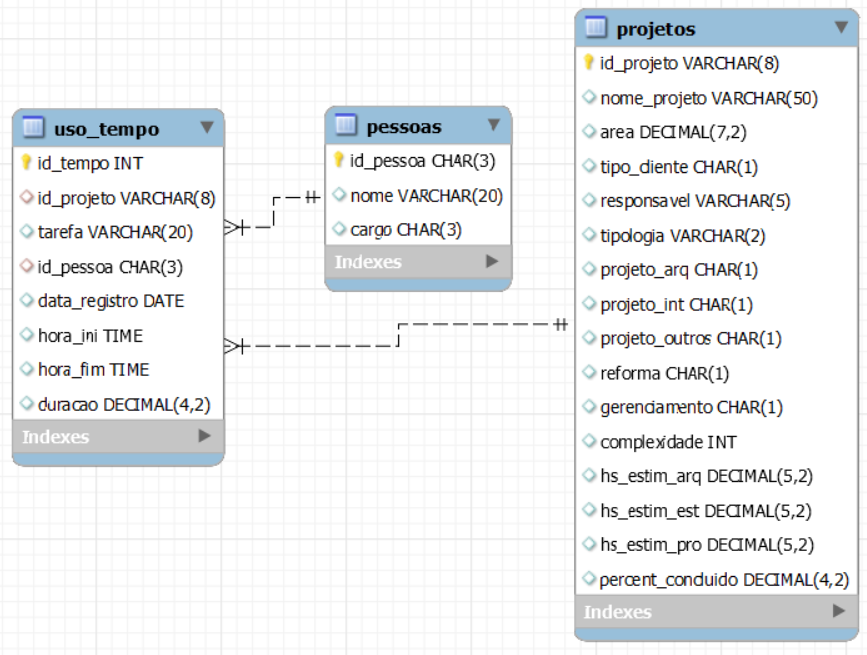
